Depth with lowest median difference : 21


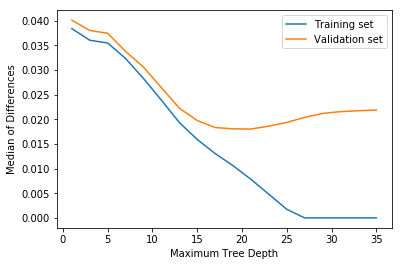

In [2]:
# # Introduction

# In start this activity by looking at how decision trees tend to overfit the data if they are left unchecked. Over fitting the data means they try to account for the outlying data points at the cost of the prediction accuracy of the general trend.
# We will also look at k-fold cross validation. This is a more robust method of validation than the held-out method we used previously.
# In k-fold cross validation, we can test every example once. This is done by splitting the data set into k subsets and training/testing the model k times using different combinations of the subsets.
# Finally, we look at how accurate our model is on QSOs compared with other galaxies. As mentioned in the lectures, QSOs are galaxies that have an Active Galactic Nucleus (AGN). The AGN makes the galaxy brighter and as such they are detectable with the SDSS instruments out to much higher redshifts.
# We will use the same data set as the first activity and even some of functions we wrote in previous questions.



# # Overfitting and Tree-Depth

# Decision trees have many advantages: they are simple to implement, easy to interpret, the data doesn't require too much preparation, and they are reasonably efficient computationally.
# Decision trees do have some limitations though, one of the biggest being they tend to over fit the data. What this means is that if they are left unchecked they will create an overly complicated tree that attempts to account for outliers in the data. This comes at the expense of the accuracy of the general trend.
# Part of the reason for this over-fitting is that the algorithm works by trying to optimise the decision locally at each node. There are ways in which this can be mitigated and in the next problem we will see how constraining the number of decision node rows (the tree depth) impacts on the accuracy of our predictions.



# # Setting a Maximum depth

# In order to see how the tree is overfitting we would like to examine how our decision tree performs for different tree depths. Specifically, we would like to see how it performs on test data compared to the data that was used to train it.
# Naïvely we'd expect, the deeper the tree, the better it should perform. However, as the model overfits we see a difference in its accuracy on the training data and the more general testing data.
# We can control the depth of decision tree learned, using an argument to DecisionTreeRegressor. For example, to set the maximum depth to 5:

# dtr = DecisionTreeRegressor(max_depth=5)



# # Assignment : overfitting trees

# Complete the function accuracy_by_treedepth. The function should return the median difference for both the testing and training data sets for each of the tree depths in depths.
# accuracy_by_treedepth should take the following arguments:
    
# * features and targets (as in previous problems);
# * depths: an array of tree depths to be used as the max_depth of the decision tree regressor.

# Your function should return two lists (or arrays) containing the median_diff values for the predictions made on the training and test sets using the maximum tree depths given by the depths.
# For example, if depths is [3, 5, 7], then your function should return two lists of length 3. You can choose the size of the split between your testing and training data (if in doubt, 50:50 is fine).
# We've included code to plot the differences as a function of tree depths. You should take a moment to familiarise yourself with what each line is doing. If your code is working well then your plot should look a bit like the following:

#  Median difference vs tree depth plot
# https://groklearning-cdn.com/problems/8Cet6iLGMbP2L8t7SVkEEg/overfitting.png


# # Assignment Code : 

# Here we use indices to access the data in our features and targets, however it would have been equally valid to create 4 explicit arrays train_features, test_features, train_targets and test_targets,
# We construct two lists accuracies_train and accuracies_test to which we can append the med_diff values for each depth in the for loop.
# The decision tree is instantiated upon each iteration of the loop with a new max_depth which is taken from the argument in the for loop. We also set the random_seed=0. This relates to the pseudo random numbers used to generate the tree and by setting it equal to 0 we are ensuring that all depths are tested in a consistent manner. This is not a requirement of your solution, but it is certainly recommended.
# We then train the tree and get predictions for the training and testing features. As previously mentioned, it is generally bad to use the same training data to assess the accuracy of the model, however as mentioned in the problems context we are using it for comparison.
# Finally we use the predictions for each set to calculate the med_diff (using our previously written function) and append it to our accuracies_* from earlier.

import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# paste your get_features_targets function here
def get_features_targets(data):
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

# paste your median_diff function here
def median_diff(predicted, actual):
  return np.median(np.abs(predicted - actual))

# Complete the following function
def accuracy_by_treedepth(features, targets, depths):
  # split the data into testing and training sets
  split = features.shape[0]//2
  train_features, test_features = features[:split], features[split:]
  train_targets, test_targets = targets[:split], targets[split:]

  # Initialise arrays or lists to store the accuracies for the below loop
  train_diffs = []
  test_diffs = []

  # Loop through depths
  for depth in depths:
    # initialize model with the maximum depth. 
    dtr = DecisionTreeRegressor(max_depth=depth)

    # train the model using the training set
    dtr.fit(train_features, train_targets)

    # Get the predictions for the training set and calculate their med_diff
    predictions = dtr.predict(train_features)
    train_diffs.append(median_diff(train_targets, predictions))

    # Get the predictions for the testing set and calculate their med_diff
    predictions = dtr.predict(test_features)
    test_diffs.append(median_diff(test_targets, predictions))
        
  # Return the accuracies for the training and testing sets
  return train_diffs, test_diffs    

if __name__ == "__main__":
  data = np.load('sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)

  # Generate several depths to test
  tree_depths = [i for i in range(1, 36, 2)]

  # Call the function
  train_med_diffs, test_med_diffs = accuracy_by_treedepth(features, targets, tree_depths)
  print("Depth with lowest median difference : {}".format(tree_depths[test_med_diffs.index(min(test_med_diffs))]))
    
  # Plot the results
  train_plot = plt.plot(tree_depths, train_med_diffs, label='Training set')
  test_plot = plt.plot(tree_depths, test_med_diffs, label='Validation set')
  plt.xlabel("Maximum Tree Depth")
  plt.ylabel("Median of Differences")
  plt.legend()
  plt.show()



# # Discussion Of the Results

# Your results should show a plot similar to the following: 
# data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAZIAAAEKCAYAAAA4t9PUAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzs3Xd4VGX2wPHvSYck9ACSgPROCCF0RBBEsCFFAbFgQ5pl2XVFd/2ti+su7qqoiCAqqAgiIggWxAIWBIHQm0DAKAGk9xYSzu+Pe4MhpAwkk0k5n+eZZ2bufe87JxHn5L1vE1XFGGOMuVx+vg7AGGNM4WaJxBhjTK5YIjHGGJMrlkiMMcbkiiUSY4wxuWKJxBhjTK5YIjHGGJMrlkiMMcbkiiUSY4wxuRLg6wDyQ4UKFbR69eq+DsMYYwqVFStW7FfViJzKFYtEUr16deLj430dhjHGFCoi8qsn5ezWljHGmFyxRGKMMSZXLJEYY4zJlWLRR2KM8a2zZ8+SlJTE6dOnfR2KyURISAhRUVEEBgZe1vWWSIwxXpeUlER4eDjVq1dHRHwdjklHVTlw4ABJSUnUqFHjsurw6q0tEekmIptFJEFERmZyPlhEPnDPLxWR6hnOVxOR4yLyF0/rNMYUPKdPn6Z8+fKWRAogEaF8+fK5ai16LZGIiD8wDugONAT6i0jDDMXuAw6pam1gDPBchvNjgHmXWKcxpgCyJFJw5fa/jTdbJC2BBFXdrqrJwHSgR4YyPYB33Nczgc7i/kQicguwHdhwiXXmnaUTYcuXYNsRG2NMlryZSCKBHeneJ7nHMi2jqinAEaC8iIQCjwP/vIw680ZqCqx8B6bdCu/1hr0/e+VjjDHed+DAAWJiYoiJiaFy5cpERkaef5+cnOxRHffccw+bN2/Otsy4ceOYOnVqXoR8SRYsWMBPP/2U75+bxpud7Zm1lTL+aZ9VmX8CY1T1eIYmlyd1OgVFBgGDAKpVq5ZjsBfxD4AHFsLyN+G70TC+LcTdCx2fgNDyl16fMcZnypcvz+rVqwF4+umnCQsL4y9/+csFZVQVVcXPL/O/rydPnpzj5wwbNiz3wV6GBQsWUKFCBVq3bu2Tz/dmiyQJqJrufRSwK6syIhIAlAYOAq2A/4pIIvAo8KSIDPewTgBUdaKqxqlqXEREjkvFZC4gCNoMhYdWOUkkfhKMbQY/jYfUs5dXpzGmwEhISKBx48YMHjyY2NhYdu/ezaBBg4iLi6NRo0aMGjXqfNn27duzevVqUlJSKFOmDCNHjqRp06a0adOGvXv3AvD3v/+dl1566Xz5kSNH0rJlS+rVq8fixYsBOHHiBL1796Zp06b079+fuLi480kuvccee4yGDRsSHR3N448/DsCePXvo1asXcXFxtGzZkp9++olt27bx5ptv8r///Y+YmJjzn5OfvNkiWQ7UEZEawE6gH3B7hjJzgbuBJUAfYIGqKnBVWgEReRo4rqqvuskmpzrzXmh5uOF5aHEffPEEfDESlr8F1z0LdbqCdSIa47F/frKBjbuO5mmdDauU4h83Nbqsazdu3MjkyZOZMGECAKNHj6ZcuXKkpKTQqVMn+vTpQ8OGF47pOXLkCFdffTWjR49mxIgRTJo0iZEjLx5EqqosW7aMuXPnMmrUKL744gvGjh1L5cqV+eijj1izZg2xsbEXXbdnzx4+//xzNmzYgIhw+PBhAB5++GH++te/0rp1axITE7nxxhtZv349999/PxUqVODRRx+9rN9BbnmtReL2eQwH5gObgBmqukFERonIzW6xt3D6RBKAEUC2w3mzqtNbP8NFKjaAO2fD7TMAhWm3wXu9YO+mfAvBGJO3atWqRYsWLc6/f//994mNjSU2NpZNmzaxcePGi64pUaIE3bt3B6B58+YkJiZmWnevXr0uKrNo0SL69esHQNOmTWnU6OIEWK5cOfz8/HjggQeYPXs2oaGhAHz99dcMHjyYmJgYbrnlFg4dOsSpU6cu+2fPK16dkKiqnwOfZzj2f+lenwZuzaGOp3OqM1+JQN3roNY1Tv/Jt/9J13/ypPWfGJODy205eEvalzTA1q1befnll1m2bBllypThjjvuyHR+RVBQ0PnX/v7+pKSkZFp3cHDwRWXUg1GggYGBxMfH89VXXzF9+nTGjx/Pl19+eb6Fk/7zCwJba+ty+QdC6yHw8GpocT/ET4ZXmsGScZDi2SgQY0zBcvToUcLDwylVqhS7d+9m/vz5ef4Z7du3Z8aMGQCsW7cu0xbPsWPHOHr0KDfeeCNjxoxh1apVAHTp0oVx48adL5fWtxIeHs6xY8fyPFZPWSLJxo6DJ0lOOZd9oZLl4Pr/wZDFEBUH85+E11rD5nk2/8SYQiY2NpaGDRvSuHFjHnjgAdq1a5fnn/HQQw+xc+dOoqOjeeGFF2jcuDGlS5e+oMyRI0e44YYbaNq0Kddccw0vvvgi4Awv/vHHH4mOjqZhw4a88cYbAPTo0YMZM2bQrFkzn3S2iyfNrMIuLi5OL3Vjq5TUc3R7+QcC/ITnekfTtGoZzy7c+pWTTPZvgZqd4Lp/QyWbfG+Kt02bNtGgQQNfh1EgpKSkkJKSQkhICFu3bqVr165s3bqVgADfLn2Y2X8jEVmhqnE5XWstkiwE+PvxeLf6HDqZTM/XfuTZzzZyKjk15wvrXOu0Trr/F3atggnt4NMRsGs1JJ/wfuDGmALt+PHjtGvXjqZNm9K7d29ef/11nyeR3LIWSQ6Onj7L6Hk/M23pb1QrV5LRvZrQtnYFzy4+eRC+ew6WvQHqJqHS1aBCHYio5zxXqAcV6kJoBRtGbIosa5EUfLlpkRTuNJgPSoUE8u+eTbi5aRVGfrSW299cSr8WVXni+gaULpHD2v0ly0H356DNcNi1EvZtcW557d8MK5bA2ZN/lC1R1kkoaY+0RFPmSvDz9+4PaYwxuWCJxEOta5bni0c7MObrLbz5wy8s+Hkvz9zSmOsaVc754jJVnUd6587B0Z1uYtkC+zbD/q2w5QtYNeWPcv7BUL42RNR1Wi/N74ZSVfL2hzPGmFywRHIJQgL9eaJ7A25sUoW/frSWB6es4PomlXn65kZUDA+5tMr8/P5IMLU7X3ju5EEnqaS1XvZvdfpYNs6BNe/DwM8uTkzGGOMjlkguQ5Oo0swd3o6J32/n5W+28mPCAf5+QwP6NI/Kmz0XSpaDaq2cR3o7V8C7PeGdm5xkUto7Cx8bY8ylsFFblynQ349hnWrz+cNXUadiGI/NXMtdk5ax4+DJnC++XJHN4c5ZcGK/k0yO7vbeZxlThHTs2PGiyYUvvfQSQ4cOzfa6sLAwAHbt2kWfPn2yrDunwTwvvfQSJ0/+8d1w/fXXn18/K78kJiYybdo0r9RtiSSXalcMY8aDbXimRyNW/nqIrmO+Z9KiX0g956XRcFFxcMdHcHyPk0yO7fHO5xhThPTv35/p06dfcGz69On079/fo+urVKnCzJkzL/vzMyaSzz//nDJlPJyblkcskRRwfn7CnW2q8+WIq2lVsxyjPt1InwmL2brHS0sWVGsFA2bC0V1OMjm+zzufY0wR0adPHz799FPOnDkDOF+qu3bton379hw/fpzOnTsTGxtLkyZNmDNnzkXXJyYm0rhxYwBOnTpFv379iI6Opm/fvhcsmjhkyJDzS9D/4x//AOCVV15h165ddOrUiU6dOgFQvXp19u/fD8CLL75I48aNady48fkl6BMTE2nQoAEPPPAAjRo1omvXrpkuzvjhhx/SuHFjmjZtSocOHQBITU3lscceo0WLFkRHR/P6668DMHLkSH744QdiYmIYM2ZMnvxe01gfSR6KLFOCyQNbMGf1Lv75yQauf+UHhneqw5COtQgKyOOcfWUbGDAD3usD794Md3/izEUxpqCbNxJ+X5e3dVZuAt1HZ3m6fPnytGzZki+++IIePXowffp0+vbti4gQEhLC7NmzKVWqFPv376d169bcfPPNWfZ3jh8/npIlS7J27VrWrl17wTLwzz77LOXKlSM1NZXOnTuzdu1aHn74YV588UUWLlxIhQoX/j+6YsUKJk+ezNKlS1FVWrVqxdVXX03ZsmXZunUr77//Pm+88Qa33XYbH330EXfccccF148aNYr58+cTGRl5/lbZW2+9RenSpVm+fDlnzpyhXbt2dO3aldGjR/P888/z6aefXu5vOUvWIsljIsItzSL5esTVdG98BWO+3sJNYxcxdemvLNl2gL3HTnu0+qdHqreH2z+Ag9vh3R7OaC9jTKbS395Kf1tLVXnyySeJjo6mS5cu7Ny5kz17sr5l/P3335//Qo+OjiY6Ovr8uRkzZhAbG0uzZs3YsGFDpgsyprdo0SJ69uxJaGgoYWFh9OrVix9++AGAGjVqEBMTA2S9VH27du0YOHAgb7zxBqmpzqTnL7/8knfffZeYmBhatWrFgQMH2Lp1q4e/pctjLRIvKR8WzCv9m9EjpgpPfbyev81ef/5ceHAANSNCqRURRs2IUGq6z9XLhxISeImTD2teDf3fh2n9nJbJXXOdUV/GFFTZtBy86ZZbbmHEiBGsXLmSU6dOnW9JTJ06lX379rFixQoCAwOpXr16pkvHp5dZa+WXX37h+eefZ/ny5ZQtW5aBAwfmWE92f1SmLUEPzjL0md3amjBhAkuXLuWzzz4jJiaG1atXo6qMHTuW66677oKy3377bbax5IYlEi/r3KASnepVZPfR02zfd5xte4+zff8Jtu87wZLtB5i1auf5siIQVbYENSuEXZBoakWEUTE8OOuhxbWugX7TYHp/mNIT7poDJfK3I8+Ygi4sLIyOHTty7733XtDJfuTIESpWrEhgYCALFy7k119/zbaeDh06MHXqVDp16sT69etZu3Yt4CxBHxoaSunSpdmzZw/z5s2jY8eOwB/LvGe8tdWhQwcGDhzIyJEjUVVmz57NlClTMn5klrZt20arVq1o1aoVn3zyCTt27OC6665j/PjxXHPNNQQGBrJlyxYiIyO9utS8VxOJiHQDXgb8gTdVdXSG88HAu0Bz4ADQV1UTRaQlMDGtGPC0qs52r0kEjgGpQIon68D4mp+fEFmmBJFlSnBVnQv3jz+ZnML2fSfYvv9EuiRznGW/HOTU2T8WiQwLDqBWRChDOtaiW+MrLv6QOl2g73swfYCbTD6GkNIXlzOmGOvfvz+9evW6YATXgAEDuOmmm4iLiyMmJob69etnW8eQIUO45557iI6OJiYmhpYtWwLObofNmjWjUaNG1KxZ84Il6AcNGkT37t254oorWLhw4fnjsbGxDBw48Hwd999/P82aNctyx8WMHnvsMbZu3Yqq0rlzZ5o2bUp0dDSJiYnExsaiqkRERPDxxx8THR1NQEAATZs2ZeDAgfzpT3/y9NeWI68t2igi/sAW4FogCWcP9/6qujFdmaFAtKoOFpF+QE9V7SsiJYFkVU0RkSuANUAV930iEKeq+z2NJTeLNvrKuXPK70dPu0nGacks2X6ALXuO8+T19XngqpqZt1B+/hxm3AlVmsEdsyCkVP4Hb0wGtmhjwVdQF21sCSSo6nY3oOlADyB971MP4Gn39UzgVRERVU0/qy8EKPpLFGfg5ydUKVOCKmVK0L6O0xw+fTaVP89Yw78//5nfDp7k6ZsaEeCfYbxE/evh1rdhxt0wtY8z5yQ4PP9/AGNMseHNUVuRwI5075PcY5mWUdUU4AhQHkBEWonIBmAdMNg9D05S+VJEVojIoKw+XEQGiUi8iMTv21c05lmEBPoztn8zHuxQk/d++o1BU1Zw4kwme0U3uAn6vAVJ8TD1NtsHxRjjVd5MJJn1DGdsWWRZRlWXqmojoAXwhIikrYrYTlVjge7AMBHpkNmHq+pEVY1T1biIiIjMihRKfn7CE9c34JlbGvPt5r30nbiEvUczGRnSqCf0mgg7foJpfSHZi0u3GOOB4rD3UWGV2/823kwkSUD6JWqjgF1ZlRGRAKA0cMFkCFXdBJwAGrvvd7nPe4HZOLfQip07W1/Jm3fHsX3fCXq+tpgtmc2ib9IHer4OiYvg/X5w9uLhg8bkh5CQEA4cOGDJpABSVQ4cOEBIyCWuYJ6ONzvbA3A62zsDO3E6229X1Q3pygwDmqTrbO+lqreJSA1gh9u5fiWwBIgGTgF+qnpMREKBr4BRqvpFdrEUxs52T63feYR73l7O6eRUJtzZnHaZ7d64ehp8PBRqdYJ+70Pg5f+DMeZynD17lqSkpBznVRjfCAkJISoqisDACzfr87Sz3atb7YrI9cBLOMN/J6nqsyIyCohX1bnu7aopQDOclkg/Vd0uIncCI4GzwDmcZPGxiNTEaYWAM1Bgmqo+m1McRTmRAOw8fIp7Ji9j+74TjO4dTZ/mURcXWjkF5g6H2tdCv6kQEHxxGWOMSadAJJKCoqgnEnD2lh/y3gp+TDjAI53r8GiXOhcPD17xNnzyCNTtBre9a8nEGJMtTxOJrbVVRJQKCWTywJb0aR7Fy99s5c8friE55dyFhZoPhBtedLbzndoHTh/xSazGmKLFEkkREhTgx//6RPOnLnWZtXInAycv48ipsxcWanEf3DIBfl0Mk7rBkSTfBGuMKTIskRQxIsIjXerwwq1NWZ54kD7jF5N0KMPQ35j+zkTFI0nwZhfYvdY3wRpjigRLJEVU7+ZRvHNPS34/epqery1mXVKG21g1O8K9XwACk7tDwtc+iNIYUxRYIinC2tauwKwhbQny9+O215fwzaYMeyxUagT3fw1lqzsz4Fd6vuqoMcaksURSxNWpFM7sYW2pXTGMB96NZ8qSxAsLlI6Ee+ZBjQ7O8OCF/4ZiMJLPGJN3LJEUAxXDQ/jgwdZcU78iT83ZwL8/38S5c+mSRUgpGPAhxNwB3z3nTF5MSfZdwMaYQsUSSTFRMiiA1++M4642VzLx++38Y+6GC5er8A+EHq9CxydgzTSYdqsNDzbGeMQSSTHi7yf88+ZGPNihJlN++pXXvt12YQER6DgSerzmrM81qTsc2Zl5ZcYY47JEUsyICI93q88tMVX43/zNfBi/4+JCzQY4t7oO/+YMD/59/cVljDHGZYmkGPLzE/7bpylX1anAyFnrWPjz3osL1brGHR6MM3Fx24L8DdIYU2hYIimmggL8GH9HcxpcEc7QqStZvePwxYUqN3aGB5epBlNvhVVT8z9QY0yBZ4mkGAsLDmDywJZEhAdz79vL2b7v+MWFSkfCvfOgenuYMxS+fc6GBxtjLmCJpJiLCA/mnXtbIsBdk5ax91gm+0WElIbbP4Smt8O3/4Y5wyH17MXljDHFUo6JRERCRcTPfV1XRG4WkcCcrjOFR40KoUwa2IIDx5O5Z/Jyjp3OJEkEBMEtr8HVj8Pq95xbXaeP5n+wxpgCx5MWyfdAiIhEAt8A9wBve1K5iHQTkc0ikiAiIzM5HywiH7jnl4pIdfd4SxFZ7T7WiEhPT+s0l6dp1TKMvyOWzb8fY/B7Ky5egh6c4cGdnoSbX4VfvnfW6Dq+L/+DNcYUKJ4kElHVk0AvYKyq9gQa5niRiD8wDujulu8vIhmvuw84pKq1gTHAc+7x9UCcqsYA3YDXRSTAwzrNZepYryKje0fzY8IB/vLhmgtnv6cXeycMmAEHtsH7fSH5ZObljDHFgkeJRETaAAOAz9xjAR5c1xJIUNXtqpoMTAd6ZCjTA3jHfT0T6CwioqonVTXFPR4CpH2jeVKnyYU+zaP4a7d6zF2zi//M25R1wdpdoM9bsHMlfHQ/nEvNvyCNMQWKJ4nkUeAJYLaqbnD3TV/owXWRQPrZbknusUzLuInjCFAeQERaicgGYB0w2D3vSZ0ml4ZcXYuBbavzxg+/8Mb327MuWP8G6P5f2PwZfPGEjeYyppjKsWWhqt8B34lIqPt+O/CwB3VLJscyftNkWUZVlwKNRKQB8I6IzPOwTqdikUHAIIBq1ap5EK5JIyI8dWND9h47zbOfb6JiqWB6xGSRr1sNgsO/wpJXoeyV0GZY/gZrjPE5T0ZttRGRjcAm931TEXnNg7qTgKrp3kcBu7IqIyIBQGngYPoCqroJOAE09rDOtOsmqmqcqsZFRER4EK5Jz99PePG2GFrVKMdfPlzDoq37sy587TPQ4GaY/zfYOCf/gjTGFAie3Np6CbgOOACgqmuADh5ctxyoIyI1RCQI6AfMzVBmLnC3+7oPsEBV1b0mAEBErgTqAYke1mnySEigPxPviqNWRBgPToln/c4sVgP284NeEyGqBcwaBL8tzd9AjTE+5dGERFXNuLJfjj2rbp/GcGA+TmtmhtvHMkpEbnaLvQWUF5EEYASQNpy3PbBGRFYDs4Ghqro/qzo9+RnM5SldIpC372lJ6RKBDJy8nB0HsxihFVgC+k+HUlXg/X7OiC5jTLEgmkMHqYjMBF4EXgVa4/SPxKlqP++Hlzfi4uI0Pj7e12EUagl7j9F7/BLKhQYxc3AbyocFZ17wwDZ461pnNvx9X0FohfwN1BiTZ0RkharG5VTOkxbJYGAYzuioJCDGfW+KkdoVw5k0MI5dh09x79vLOZmcknnB8rWclsnRXU7L5Oyp/A3UGJPvckwk7i2lAapaSVUrquodqnogP4IzBUvzK8sxtn8z1u08wrCpKzmbmsnsd4CqLaHXG5AUD7MesDkmxhRxnozaekdEyqR7X1ZEJnk3LFNQdW1UmX/d0oSFm/fxxKx1ZHlrtOHNcN2/YdMn8OVT+RukMSZfeTJDPVpVz29WoaqHRKSZF2MyBdztraqx5+hpXv5mK1eWK8lDnetkXrDNUGeXxZ/GOXuatB6cv4EaY/KFJ4nET0TKquohABEp5+F1pgh7tEsdfjt4khe+2kKdSuF0a1w584LXPQtHdsAXI6F0FDS4MX8DNcZ4nSed7S8Ai0XkGRF5BlgM/Ne7YZmCTkT4T68mNK1ahhEzVrNxVxZLyvv5O/0lkc2dNbmSbPScMUWNJ53t7+JMFtwD7AV6qeoUbwdmCr6QQH/euLM5pUICeeDdePYfP5N5waCSzkiu8EowrS8czGb9LmNMoePpDok/A7OAOcBxEbHFqwwAFUuFMPGu5uw/foYhWe1jAhAWAQM+Ak11NsU6eTDzcsaYQseTUVsP4bRGvgI+xVlK/lMvx2UKkeioMjx/a1OWJx7iqY/XZz2Sq0Jtp2VyeAe83x/OZrKtrzGm0PGkRfIIUE9VG6lqtKo2UdVobwdmCpebmlZheKfafBC/g8k/JmZdsFpr6PU67PgJZj8I57JowRhjCg1PEskOnH1CjMnWiGvr0rVhJf712Ua+35LNFryNejorBm/8GL7+R/4FaIzxCk8SyXbgWxF5QkRGpD28HZgpfPz8hDF9Y6hbKZxh01aybd/xrAu3fQhaPACLX4Flb+RfkMaYPOdJIvkNp38kCAhP9zDmIqHBAbxxVxyB/n488E48R06ezbygCHR/Dup2h3l/hc3z8jdQY0yeyXH13/MFRUJV9YSX4/EKW/03/y3dfoA73lpK65rlmTywBQH+WfzNknwC3r4R9v0MAz+DyNj8DdQYk6U8W/03FzskmmKsVc3yPNOjMT9s3c+/P/8564JBoXD7B85y89Nug0OJ+RajMSZveHOHRFPM9WtZjYFtqzPpx1+YsTzj3mjphFV05piknnXmmJw6lH9BGmNyzWs7JAKISDcR2SwiCSIyMpPzwSLygXt+qYhUd49fKyIrRGSd+3xNumu+detc7T4qehKL8Y2/39CAq+pU4G8fr2N5YjaTECPqQr9pTotk+gBIyWKWvDGmwPFo+K+ItAVURIJE5C+4t7myIyL+wDigO9AQ6C8iDTMUuw84pKq1gTHAc+7x/cBNqtoEZ0/3jEuyDFDVGPex14OfwfhIgL8fr/aPJapsSQZPWUHSoSy26gWo3g5uGQ+//ggfD7E5JsYUEt7cIbElkKCq21U1GZgO9MhQpgfwjvt6JtBZRERVV6nqLvf4BiBERLLY29UUdKVLBvLGXXEkp57j/nfiOXEmi90VAZr0gS5Pw/qPYMGo/ArRGJML2SYSt1Vx52XukBiJM5kxTZJ7LNMyqpqCM/GxfIYyvYFVqpr+Xsdk97bWUyIiHsRifKx2xTDG9m/Glj3HGDFjNefOZTNasN2jEHcvLBoD8baHmjEFXbaJRFVTubgV4anMvuAzfntkW0ZEGuHc7now3fkB7i2vq9zHnZl+uMggEYkXkfh9+7KZZW3yTcd6FXny+gbM37CHl77eknVBEej+P6hzHXz2Z9jyZf4FaYy5ZJ7c2vpRRF4VkatEJDbt4cF1SUDVdO+jgF1ZlRGRAKA0cNB9HwXMBu5S1W1pF6jqTvf5GDAN5xbaRVR1oqrGqWpcRESEB+Ga/HBf+xrc2jyKVxYk8OnajP8c0vEPgD6ToHIT+HAg7FqdbzEaYy6NJ4mkLdAIGIWzydULwPMeXLccqCMiNUQkCOgHzM1QZi5OZzo4e54sUFV194j/DHhCVX9MKywiASJSwX0dCNwIrPcgFlNAiAj/6tmY5leW5S8frmH9zmyWcQsOg9tnQMlyzhyTw7/lX6DGGI95PLP9sioXuR5nHoo/MElVnxWRUUC8qs4VkRCcEVnNcFoi/VR1u4j8HXgC2Jquuq7ACeB7INCt82tghHsLLks2s73g2XfsDD1eXYQCc4a3o2J4SNaF9/4Mb3WFUlfAvfOhRJl8i9OY4szTme05JhIRqQT8G6iiqt3dIbxtVPWtvAnV+yyRFEwbdh2hz/gl1KsczvRBrQkJ9M+68C/fw5RezjL0d3wEATaIzxhvy7MlUoC3gflAFff9FuDRyw/NGEejKqV58bamrN5xmP+bk82GWAA1OsAtr0HiDzD3IfBiS9oYc2k8SSQVVHUGcA7OD9P1aGa7MTnp3uQKHrqmNjPik5jy06/ZF46+Da55CtZ+AAufzZ8AjTE5CvCgzAkRKY87LFdEWmMbXZk89Kcuddm46yijPtlIvUrhtKqZcSpROlf9GQ7/Ct//D0pXheZ3Z13WGJMvPGmRjMAZXVVLRH4E3gUe8mpUpljx8xPG9IuhWrmSDJ26kl2HT2VdWARueBFqd4FP/wRbv86/QI0xmcoykYjIre7LQ8DVOMOAHwQaqerafIhK67K0AAAgAElEQVTNFCOlQgKZeFdzzqSc48EpKzh9Npu7p/6BcOvbUKkhfHg37LZ/jsb4UnYtkifc549UNUVVN6jqelXNYss7Y3KndsVwxvSNYd3OIzw5e132ne/B4XD7hxBSxpljciQp/wI1xlwgu0RyUEQWAjVEZG7GR34FaIqXaxtW4tEudZi1cidvL07MvnCpK2DAh84ui1NvhdPWdWeML2TX2X49EIszYfCF/AnHGHj4mjps2HWUf322iXqVw2lbq0LWhSs1hL5T4L3ezj4mfd+zCYvG5LPsWiRvqepPwBuq+l3GR34FaIofPz/hxduaUr18SYZPW5X9HiYANTtCj3Hw62IY3xa2f5sPURpj0mQ5s93dp707zoitjmRYqVdVs9nurmCxme2F07Z9x7nl1R+pVr4kMwe3pURQNjPfAZJWwOxBcCABWg2BLv+AwBL5E6wxeSn1LJw9BSmnc/F82nnuNRH8cvh/JwuezmzP7tbWBOALoCawggsTibrHjfGaWhFhvNw/hvveieeJWWsZ0zeGbLefiWoOD/4AX/8Dlo6Hbd9Az9ch0pPFqo3JpeSTcHwPJB+HM8ed5/OvT0DysXSvj2cod8J9fcx5nZp8+XEElIDAkD+eU85AUMm8+zkz4claW+NVdYhXo/Aya5EUbmO/2coLX23h7zc04P6rPPz7ZdsC+HgYnNgLVz8O7Uc4S9Mbc6lSzsCx393H7iyef4czHgz28At0VrUOCoegUPd1KASFOSMR014HhTqt6YCQLJ6DL04YAe7xPNzrL9eLNopIKVU9KiLlMjtvt7ZMfjl3Thk6dSVfbvydd+9tRfs62XS+p3fqEHz+GKz7ECKbQ8+JUKG2d4M1hc+x32HXKmcIeWYJ41QmX3V+gRB+BYRXdh/u67CKEFwqk2ThPgKC8v/ny4W8SCSfquqNIvJLJqdVVQvNrS1LJIXf8TMp9Bz3I/uOn+GT4e2pWu4SmurrP4JPRzh/WXZ9Blrcn6d/tZlCJOUM/L4OdiyDpOXO40i6HcHFH8IqXZgcMnsuURb8PFkYpHDLs2XkiwJLJEVD4v4T3PzqIqqUKcGsoW0pGXQJt6qO7oY5w5x+k1rXOKO8SlXJ+TpTuB3ZCUnLICneSR6710DqGedcqSio2gKiWjgt1rI1ILTCZXdMF0V5kkjc7W+7A/XdQxuB+e4KwIWGJZKi49vNe7nn7eXc0OQKxvZvln3ne0aqEP8WfPkU+AfBDS9Akz7eC9bkr7OnnUSR5LY2diyHY+52zv7BUKXZH4kjqoX9IeGBXI/aEpEqwEJgN7AKZ9TWjcCLItJJVbPZcPt8Hd2Al3F2M3xTVUdnOB+Mswhkc+AA0FdVE0XkWmA0EAQkA4+p6gL3muY4e6SUAD4HHtHi0KwyAHSsV5HHrqvHf7/YTOPI0gy+upbnF4s4t7VqdoJZg+Cj+2Dz53D98852vqZwOXnQmTO0Y5mTPHavhXPuCk5lroQr20LVlhAVB5WaFLr+icIkuz6St4HVqvpShuMPA81VNdv1u0XEH2cTrGuBJJw93Pur6sZ0ZYYC0ao6WET6AT1Vta+INAP2qOouEWmM0wqKdK9ZBjwC/ISTSF5R1XnZxWItkqJFVRk+bRXz1u9m8j0tubpuxKVXkpoCi8bAd6MhNMK51VW7c94Ha/LOuVSnUzzha+excwXoOQgsCVVinYRRtSVExkF4JV9HWyTkRWf7z6paP4tzm1W1Xg4BtAGeVtXr3PdPAKjqf9KVme+WWeLeRvsdiEjfwhDn3sV+nB0aywEL0+ISkf5AR1V9MLtYLJEUPSfOpNB7/GJ2HT7FJw+158ryoZdX0a5VMOtB2L8ZWjwA147y+ph7cwmO74WEb5zEsW2BO4JKnKRRuwvU6uzcsrKh3V6RFxMSs9kUghzWrAAgEkg3HIIkoFVWZVQ1RUSOAOVxEkea3sAqVT0jIpFuPenrjMzsw0VkEDAIoFq1ah6EawqT0OAAJt4Zx02vLmLQuyuYNbQtocGX8WVSpRk8+B188wz8NA62L4RbJjj30k3+S01xblOltTp2r3GOh1aEut2cVmOta+xWZAGT3f95pUWkVybHBSjlQd2Z9YJmbP5kW0ZEGgHPAV0voU7noOpEYCI4LZKcgjWFT7XyJRnbvxkDJy/jsZlrGHd77KV1vqcJLAHd/g31usHsIfBWF4hqCbF3QaOezjwA4z1Hdv6ROLZ/50zsE3+o2go6/5/T8qjUpFgMty2ssksk3wE3ZXHuew/qTgKqpnsfBWTsoE8rk+Te2ioNHAQQkShgNnCXqm5LVz4qhzpNMdKhbgSPd6vPf+b9zGvfbmNYp1xMOKzRAYYuhlXvwYp3YO5w+GIkNO7tbOlbJdbmn+SFU4dg50qn9ZfwDex1u01LRUKjHlD7Wqh5NYSU9m2cxmNZJhJVvSeXdS8H6ohIDWAn0A+4PUOZucDdwBKgD7BAVVVEygCfAU+o6o/pYtotIsfcfeOXAncBY3MZpynkBnWoyfpdR3n+y82UKhHIna2vvPzKQkpDm2HQeqgzGmjlu87M+JXvQKXGTiulya12a8VTySec21M7Vzr9UbtWwsHtzjn/IKjWBq59BupcCxH1LVEXUl6dkCgi1wMv4Qz/naSqz4rIKCBeVeeKSAjOfifNcFoi/VR1u4j8HWeHxq3pquuqqntFJI4/hv/OAx7KafivdbYXfafPpjJs6kq++XkvI7vXv7RhwTlWftSZHb/yXeeL0D8YGt7sJJUr29stlzQpZ+D39c7vaNcqJ3ns3+yMrAJnAmCVGGcRzSqxzlwOu21YoNnM9nQskRQPZ1PP8acPVvPp2t0M71SbP3ete3l9Jtn5fZ2TUNZ+4OzIWLYGxN4JMQOc5TOKi9QU2PezkzTSWht7Nvwxj6NkhT8SRpVmzuuwir6N2VyyvBj+e6uqfigiNVQ1s/W2Cg1LJMVH6jnlb7PXMX35Dga2rc7/3dgQPz8v3C45ewo2feIklcQfnM7hut2cVkrtLkVnOKoqnNjvtCz2/Qz7Nju3qnavhRR3YGdwKaelUSXWTR7NoHRVu01VBORFIlmpqrFpz3keYT6yRFK8qCr/+mwTby36hVubRzG6dzT+3kgmaQ5scxLK6mnOsvXhVzgtlAY3OpMdS5R1Js0V5C9WVTi6y00YaUlji/OcfvXboDCnryitlVElFsrVtNt7RVReJJKvcDrjY4AfMp5X1ZtzG2R+sURS/KgqL329lZe/2coNTa5gTN8YggK8/GWXeha2zHeSSsJXf/QNgNOvUqKs8yhZ7o/XmR5L9zqvJ0eeOweHf3WSRcakkXzsj3Ilyjqd3xXqOs8R9ZxHqciCnRBNnsqLCYk3ALE4neEv5FVgxuQHEeFP19YlLDiAZz/fxInkFCbc0ZyQQC+u7Oof6LRCGtzozI3YucIZ6nrqoPN80n0+ddgZuZR2LG012swEhDitGT9/8AtwbqH5+bnP/hmeMx4PuPDY8T2wP+GPW1IAYZUhoi7E9HcSRYV6TuIIrWAJw3jMkx0SI1R1n4iE4+xDcjx/Qss71iIp3qYt/Y2/fbyOltXL8ebdcYSHBPo6pAsln3QTTLqkkz7xJJ8ATXXWmtJz7nNqhufMjp9zn1OcYyXL/9GySGttlCjj65/eFGB50SJJU0lEvsRZ50pEZB9wt6quz22QxuSH21tVIzTYnxEz1nDHm0t5596WlClZgFaCDSrpPEpnutqPMQWeJzeNJwIjVPVKVa0G/Nk9Zkyh0SMmkgl3NGfT78fo+/pP7D122tchGVNkeJJIQlV1YdobVf0WuMylVo3xnWsbVmLywBbsOHSS2yYsIemQJ2uPGmNy4kki2S4iT4lIdffxd6BQzysxxVe72hWYcl8rDp5I5rYJS9i+r9B1+RlT4HiSSO4FIoBZ7qMCkNt1uIzxmeZXluX9Qa05k3KO215fwqbdR30dkjGFWo6JRFUPqerDqhrrPh5V1UP5EZwx3tKoSmlmDG5DoL8ffV9fwqrf7J+0MZfLpqOaYqtWRBgzHmxD2dAgBry5lMXb9ud8kTHmIpZITLFWtVxJPnywDVFlSzBw8nIW/LzH1yEZU+hYIjHFXsVSIXwwqA31K4cz6N0VfLLG9koz5lLkOCFRRCKAB4Dq6cur6r3eC8uY/FU2NIip97fivrfjeej9VWzdc4xHutT17mKPxhQRnrRI5uBsgfs1zq6FaY8ciUg3EdksIgkiMjKT88Ei8oF7fqmIVHePlxeRhSJyXERezXDNt26dq92HbXJg8kR4SCDv3teSW5tH8cqCBO59ezmHTyb7OixjCjxPlkgpqaqPX2rFIuIPjAOuxdlrfbmIzFXVjemK3QccUtXaItIPeA7oC5wGngIau4+MBqiqLZ5l8lxIoD//7RNNTLUyPD13Aze9uogJdzSnURXbP9yYrHjSIvnU3TL3UrUEElR1u6omA9OBHhnK9ADecV/PBDqLiKjqCVVdhJNQjMlXIsKAVlcy48E2nE1Rer22mI9WJPk6LGMKLE8SySM4yeSUiBwVkWMi4skMrkhgR7r3Se6xTMuoagpwBCjvQd2T3dtaT0me76VqjKNZtbJ8+nB7mlUrw58/XMNTH68nOeVczhcaU8x4MiExXFX9VLWEqpZy35fyoO7MvuAzrlnvSZmMBqhqE+Aq93Fnph8uMkhE4kUkft++fTkGa0xmKoQF8959rRjUoSZTfvqVfhOX8PsRaygbk55Hw39FpKyItBSRDmkPDy5LAqqmex8FZBxXeb6MiATgdOofJBuqutN9PgZMw7mFllm5iaoap6pxERERHoRrTOYC/P148voGjLs9lp9/P8aNYxexdPsBX4dlTIGRYyIRkfuB74H5wD/d56c9qHs5UEdEaohIENAPmJuhzFzgbvd1H2CBZrPTlogEiEgF93UgcCNg+6KYfHFD9BXMGdaOUiEB3P7mUt5a9As5bQxnTHHgaR9JC+BXVe0ENANyvFfk9nkMx0k8m4AZqrpBREaJSNp+728B5UUkARgBnB8iLCKJwIvAQBFJEpGGQDAwX0TWAquBncAbHv2kxuSBOpXCmTO8HV0aVOSZTzfy8PTVnExO8XVYxviUJ1vtLlfVFiKyGmilqmdEZLWqxuRPiLlnW+2avKaqjP9uG8/P30ydiuFMuLM5NSrYNj2maPF0q11PWiRJIlIG+Bj4SkTmcHFfhzHFiogwtGNt3r23FXuPnebmsYv4eqOt02WKpxxbJBcUFrkap0P8C3duSKFgLRLjTTsPn2LIeytYm3SEh66pzaO2tIopInLdIhGRUu5zubQHsA5YBITlWaTGFHKRZUow48E29GtRlbELErjHllYxxUx2t7amuc8rgHj3eUW698YYV0igP6N7R/OfXk34adsBbhy7iPU7j/g6LGPyRZaJRFVvdJ9rqGpN9zntUTP/QjSm8OjfshozBrfh3Dml52s/8tq3CaSesyHCpmjLso9ERGKzu1BVV3olIi+wPhKT3w6eSObvH6/j83W/06xaGV64tSk1I+yOsClcPO0jyS6RLHRfhgBxwBqcJU2igaWq2j6PYvU6SyTGF1SVT9bu5qmP13MmJZXHu9Xn7jbV8bOOeFNI5LqzXVU7uRMQfwVi3eVGmuNMSEzIu1CNKZpEhJubVuHLP3Wgba0K/POTjQx4cyk7Dp70dWjG5ClP5pHUV9V1aW9UdT1QaCYjGuNrlUqF8Nbdcfy3dzTrdh6h+8s/8MHy32x5FVNkeJJINonImyLSUUSuFpE3cJY8McZ4SES4rUVV5j1yFU0iS/P4R+u49+3l7DlqKwmbws+TRHIPsAFnza1HgY3uMWPMJapariRT72/F0zc1ZMn2A3Qd8z1zVu+01okp1Dya2S4iJYBqqrrZ+yHlPetsNwXR9n3H+fOHa1j122G6N67Mv25pTPmwYF+HZcx5ebbWlrtS72rgC/d9jIhkXA7eGHOJakaEMXNwWx7vVp9vNu3lupe+Z/6G330dljGXzJNbW//A2TzqMICqrgaqezEmY4oNfz9hSMdazH2oHRXDQ3hwygpGzFjNkVNnfR2aMR7zJJGkqKqt9WCMF9WvXIqPh7Xj4WtqM2f1Lq4b8z3fb7Etok3h4EkiWS8itwP+IlJHRMYCi70clzHFTlCAHyO61mPWkLaEBvtz16Rl/G32Ok6csY2zTMHmSSJ5CGgEnAHeB47ijN7KkYh0E5HNIpIgIiMzOR8sIh+455eKSHX3eHkRWSgix0Xk1QzXNBeRde41r4iITRM2RUrTqmX47OGreOCqGkxb9hs3vPIDG3cd9XVYxmQpx0SiqidV9W+q2sKd3f43Vc1x8LuI+APjgO5AQ6C/u11uevcBh1S1NjAGeM49fhp4CvhLJlWPBwYBddxHt5xiMaawCQn05283NOT9B1pzMjmVnq/9yIzlO3wdljGZCsjqRE4js1T15uzO43TQJ6jqdre+6UAPnHkoaXoAT7uvZwKvioio6glgkYjUzhDTFUApVV3ivn8XuAWYl0MsxhRKrWuW5/NHruKR6av460drWZZ4kGd6NKZEkL+vQzPmvCwTCdAG2IFzO2spzoKNlyLSvT5NEtAqqzKqmiIiR4DywP5s6kzKUGfkJcZlTKFSISyYd+9txctfb2HswgTW7zzCuAGx1LLVhE0Bkd2trcrAk0Bj4GXgWmC/qn6nqt95UHdmiSfj7EdPylxWeREZJCLxIhK/b5+NfjGFm7+fMKJrPd6+pyV7jjp7xH+6dpevwzIGyH7131RV/UJV7wZa46z4+62IPORh3UlA1XTvo4CM//LPlxGRAJz94A/mUGdUDnWmxT/R7dOJi4iI8DBkYwq2q+tG8NnDV1GvcjjDp63i6bkbSE455+uwTDGXbWe7O6qqF/AeMAx4BZjlYd3LgToiUkNEgoB+QMZ+l7nA3e7rPsACzWbNFlXdDRwTkdbuaK27gDkexmNMkVClTAmmD2rDfe1r8PbiRG59fQlJh2xpeuM72W1s9Q7Oba15wHR3+fhLq1zkeuAlwB+YpKrPisgoIF5V54pICDAFZ4+Tg0C/dJ3ziUApIAhnVn1XVd0oInHA20AJN7aHsks+YGttmaJr3rrd/HXmWvz8hJf6xtCpfkVfh2SKkLzYIfEccMJ9m76QAKqqpXIdZT6xRGKKssT9JxgydSWbdh9laMdajLi2LgH+nkwRMyZ7ebFDop+qhruPUuke4YUpiRhT1FWvEMrsoW3p16Iqr327jTveWsreY7bPick/9meLMUVASKA/o3tH88KtTVm94zA3vLKIJdsO+DosU0xYIjGmCOndPIo5w9oTHhLAgDd/YtzCBM6ds02zjHdZIjGmiKlXOZy5w9tzQ3QV/jd/M/e/G8/hk8m+DssUYZZIjCmCwoIDeKVfDKN6NOKHrfu44ZVFrNlx2NdhmSLKEokxRZSIcFeb6swc3BaAW19fwpzVO30clSmKLJEYU8Q1rVqGTx5qT0zVMjwyfTUvfrnZ+k1MnrJEYkwxUC40iPfua0XfuKq8siCBYdNWcjLZNswyecMSiTHFRFCAH6N7N+HvNzRg/obfue31Jew+csrXYZkiwBKJMcWIiHD/VTV58+44EvefpMerP7LaOuFNLlkiMaYYuqZ+JWYNbUtwoB99X1/C3DW2JL25fJZIjCmm6lYK5+Oh7WgaVYaH31/Fi19tsU54c1kskRhTjJUPC+a9+1txa/MoXvlmK8PfX8mp5FRfh2UKGUskxhRzQQF+/LdPNH+7vgHz1jud8L8fsUUfjecskRhjEBEe6FCTN++KY/u+49z86iLWJlknvPGMJRJjzHmdG1Ri1tB2BAX4ceuEJbYvvPGIVxOJiHQTkc0ikiAiIzM5HywiH7jnl4pI9XTnnnCPbxaR69IdTxSRdSKyWkRstypj8li9yuHMGdaO6KjSDJ+2ijFfbSGHTUhNMee1RCIi/sA4oDvQEOgvIg0zFLsPOKSqtYExwHPutQ1x9nhvBHQDXnPrS9NJVWM82bnLGHPp0jrh+zSP4uVvtjL8/VXWCW+y5M0WSUsgQVW3q2oyMB3okaFMD+Ad9/VMoLOIiHt8uqqeUdVfgAS3PmNMPgkO8Od/faJ5ont9Pl+3m74TrRPeZM6biSQS2JHufZJ7LNMyqpoCHAHK53CtAl+KyAoRGZTVh4vIIBGJF5H4ffv25eoHMaa4EhEevLoWb9wZx7a9x+kxbhHrko74OixTwHgzkUgmxzLeaM2qTHbXtlPVWJxbZsNEpENmH66qE1U1TlXjIiIiPI3ZGJOJLg0r8dHQtgT4+XHr64v5fN1uX4dkChBvJpIkoGq691FAxiEg58uISABQGjiY3bWqmva8F5iN3fIyJl/Ur1yKOcPb0ahKaYZOXcnYb7ZaJ7wBvJtIlgN1RKSGiAThdJ7PzVBmLnC3+7oPsECdf5lzgX7uqK4aQB1gmYiEikg4gIiEAl2B9V78GYwx6VQIC2bq/a3o1SySF77awqMfrOb0WeuEL+4CvFWxqqaIyHBgPuAPTFLVDSIyCohX1bnAW8AUEUnAaYn0c6/dICIzgI1ACjBMVVNFpBIw2+mPJwCYpqpfeOtnMMZcLCTQnxdua0rtSmH894vN/HrgJBPvak7F8BBfh2Z8RIpD0zQuLk7j423KiTF57Yv1v/OnD1ZTtmQgb97dgoZVSvk6JJOHRGSFJ9MsbGa7MeaydWtcmQ8Ht0GBPhMW89XGPb4OyfiAJRJjTK40jizNnGHtqFMxjEFT4pnw3TbrhC9mLJEYY3KtYqkQPniwDTc0uYLR837msZlrOZNinfDFhdc6240xxUtIoD9j+zejdsUwXvp6K78dOMmEO5tTLjTI16EZL7MWiTEmz4gIj3apy9j+zViTdJge4xaxdc8xX4dlvMwSiTEmz93UtAofPNiG02fP0eu1xSzcvNfXIRkvskRijPGKmKplmDu8HVXLleS+t5czadEv1glfRFkiMcZ4zRWlSzBzSBuubViJUZ9u5G8fr+ds6jlfh2XymCUSY4xXlQwKYPyA5gzrVItpS3/j7knLOHwy2ddhmTxkicQY43V+fsJj19XnxduaEp94iJ6vLWbNDtsTvqiwRGKMyTe9YqN4f1Arjp0+S49xP3LXpGUsTzzo67BMLlkiMcbkq+ZXlmPhXzryeLf6bNh5hFsnLKHv60v4Yes+64wvpGzRRmOMz5xKTmX68t94/bvt/H70NE2rlmF4p9p0aVARd5Vv40OeLtpoicQY43NnUlL5aMVOxn+XwI6Dp6hfOZxhnWpzfZMr8PezhOIrlkjSsURiTOGQknqOT9bu4tUFCWzbd4KaFUIZ0rEWtzSLJNDf7sTntwKxjLyIdBORzSKSICIjMzkfLCIfuOeXikj1dOeecI9vFpHrPK3TGFN4Bfj70bNZFF/96WpeGxBLSKA/j81cS8f/fcuUn3613RgLKK+1SETEH9gCXIuzB/tyoL+qbkxXZigQraqDRaQf0FNV+4pIQ+B9nP3YqwBfA3Xdy7KtMzPWIjGmcFJVFm7ey9gFCaz67TAVw4MZ1KEmt7eqRskgW3PW2wpCi6QlkKCq21U1GZgO9MhQpgfwjvt6JtBZnB62HsB0VT2jqr8ACW59ntRpjCkiRIRr6ldi1pC2TLu/FbUiwvjXZ5toN3oBry7YytHTZ30dosG7y8hHAjvSvU8CWmVVxt3j/QhQ3j3+U4ZrI93XOdVpjCliRIS2tSvQtnYFVvx6kFcXJPD8l1uY8N12rihte8Vn59OH2xMc4O/Vz/BmIslsqEXG+2hZlcnqeGYtqEzvzYnIIGAQQLVq1bKO0hhTqDS/shyT72nJ+p1HeO+nX61VkgPJ9Os0b3kzkSQBVdO9jwJ2ZVEmSUQCgNLAwRyuzalOAFR1IjARnD6Sy/sRjDEFVePI0ozuHe3rMAze7SNZDtQRkRoiEgT0A+ZmKDMXuNt93QdYoE7v/1ygnzuqqwZQB1jmYZ3GGGPykddaJG6fx3BgPuAPTFLVDSIyCohX1bnAW8AUEUnAaYn0c6/dICIzgI1ACjBMVVMBMqvTWz+DMcaYnNmERGOMMZkqCMN/jTHGFAOWSIwxxuSKJRJjjDG5YonEGGNMrlgiMcYYkyvFYtSWiOwDfs3kVAVgfz6Hk1uFLebCFi9YzPnFYva+3MZ7papG5FSoWCSSrIhIvCdD2wqSwhZzYYsXLOb8YjF7X37Fa7e2jDHG5IolEmOMMblS3BPJRF8HcBkKW8yFLV6wmPOLxex9+RJvse4jMcYYk3vFvUVijDEml4plIhGRbiKyWUQSRGSkr+PxhIgkisg6EVktIgVyBUoRmSQie0Vkfbpj5UTkKxHZ6j6X9WWMGWUR89MistP9Xa8Wket9GWN6IlJVRBaKyCYR2SAij7jHC+zvOZuYC/LvOURElonIGjfmf7rHa4jIUvf3/IG7nUWBkE3Mb4vIL+l+zzF5/tnF7daWiPgDW4BrcTbQWg70V9WNPg0sByKSCMSpaoEdwy4iHYDjwLuq2tg99l/goKqOdpN2WVV93JdxppdFzE8Dx1X1eV/GlhkRuQK4QlVXikg4sAK4BRhIAf09ZxPzbRTc37MAoap6XEQCgUXAI8AIYJaqTheRCcAaVR3vy1jTZBPzYOBTVZ3prc8uji2SlkCCqm5X1WRgOtDDxzEVCar6Pc6+Mun1AN5xX7+D8wVSYGQRc4GlqrtVdaX7+hiwCYikAP+es4m5wFLHcfdtoPtQ4Bog7Qu5oP2es4rZ64pjIokEdqR7n0QB/0f9/+2df4gVVRTHP193S81Ky1QQC1E2E9RUSiT7obBEUYQLGyhEShlJSoT0RwkhmKJEpYYlEZkS5Q/wR5sUmfgrNELNH6tpWhGxKWtBZkkGuac/7h0d1rdvn/tW3zz3fGB4d+7ce+bM4c2cmXNnzo0YsFHSnjgffbnQx8xOQLigAL1LrE+hTJd0IIa+MhMmSiOpPzAC+IYysXMzncDIEN0AAAWTSURBVCHDdpZUIWkfcBL4EvgROGVm/8Ummbt2NNfZzBI7z412XiCpc3vvtyM6EuWoK4f43hgzGwk8DEyLIRnn8rAEGAgMB04Ab5RWnYuRdD2wBnjBzE6XWp9CyKFzpu1sZufMbDjQjxDJGJyr2ZXVKj/NdZY0BHgZuAO4G7gZaPeQZ0d0JA3Aran1fsDxEulSMGZ2PP6eBNYR/tjlQGOMkSex8pMl1qdVzKwxnpBNwHtkzNYx/r0G+MjM1sbqTNs5l85Zt3OCmZ0CtgKjgR6SkinKM3vtSOn8UAwtmpn9C3zAZbBzR3Qku4Cq+PbFtYR54utKrFNeJHWLg5RI6gY8CBzM3ysz1AGTYnkS8EkJdSmI5IIcqSFDto4Dqu8Dh83szdSmzNq5JZ0zbudeknrEclegmjC2swWojc2yZudcOh9J3WCIMKbT7nbucG9tAcTXDBcCFcBSM5tbYpXyImkA4SkEoBL4OIs6S1oBjCVkHG0EZgHrgdXAbcAvwONmlpnB7RZ0HksItxjwM/BsMv5QaiTdC3wF1ANNsXomYcwhk3bOo/NEsmvnYYTB9ArCDfdqM5sdz8WVhBDRXuCJeKdfcvLovBnoRQjr7wOmpgbl22ffHdGROI7jOO1HRwxtOY7jOO2IOxLHcRynKNyROI7jOEXhjsRxHMcpCnckjuM4TlG4I3HKBkkm6cPUeqWk3yRtaKO8x1Si7M+S1sVMrD9I+jOVmfWedt5PdZS/V9JRSduKybIraYCkCan1KZIWto+2TrlS2XoTx8kMZ4Ahkrqa2T+EDM6/tlWYmdVRoo9RzawGQNJY4EUzezRXO0mVqdxObWWLmY2P8kYC6yQ9aWbb2iBrAOEj3pVF6uRcRfgTiVNufA48EssTgRXJBkmjJO2Md987JQ2K9TMkLY3loZIOSrpO0mRJi2P9MklLFObN+EnSAzGR4GFJy1L7+DtVrk22Fdq/ECQ1SHpF0g6gRlKVpC9iws7tkm6P7fpIWitpt8I8FKNbkx2z8M4FpueTIWmOpOXxeI5JeiqKmA+Mi09Pz8e6flG/Y5LmXcqxOlcJZuaLL2WxEOYNGUZI492F8JXuWMJcCwA3ApWxXA2sieVOwHZCGo7dhASYEObwWBzLywh32SKkZD8NDI199wDDEx1S+tQCyy6lf45jOq9/qq4BmJFa3wIMjOUxwMZYXgWMjuX+wMEc8quB9c3q7gLq88kA5gDfRjv3jjr1aS4PmAIcA24AuhIya/ct9X/Flyu7eGjLKSvM7IBCKvKJwGfNNncHlkuqIqTduCb2aZI0GTgAvGtmO1oQ/6mZmaR6oNHM6gEkHSJcZPe1ol6x/dOsin17EJIFrgmpkoALIelqYFCq/qZU2C8f6QzYOWXE8nozOwuclbSdkD32bA55myzMM4KkI4Q0LZlMZuhcHtyROOVIHfA64W6+Z6r+VcJ4QE10NltT26oITzR988hNciY1pcrJenKupHMKdWlD/0I5E38F/G4hNXhzBIyyMEHbpTCCkICwRRnRsTTPn9RSPqX0sZ7DrysdDh8jccqRpcDs5I4/RXcuDL5PTioldQcWAfcDPSXV0nYaJQ2W1IkQKrusmNkfwAlJyeB8J0l3xs2bgGlJWxUwF3dsMxN4uwAZ4yV1lnQLcB8hLPgXIYzlOOdxR+KUHWbWYGaLcmx6DZgXB6krUvULgHfM7CjwNDBfUltnEHwJ2ABsJkzGdCWYAEyVtB84BCRveE0DxijMfPcd8EwL/cfFFxC+B94CnrMLb2zlk7GL8HLD18AsM2skZLytkLQ/NdjudHA8+6/jOBchaQ4hpObfiDit4k8kjuM4TlH4E4njOI5TFP5E4jiO4xSFOxLHcRynKNyROI7jOEXhjsRxHMcpCnckjuM4TlG4I3Ecx3GK4n/W1e8EzCVBDwAAAABJRU5ErkJggg==
# We can see that the accuracy of the decision tree on the training set gets better as we allow the tree to grow to greater depths. In fact, at a depth of 27 our errors goes to zero!
# Conversly, the accuracy measure of the predictions for the test set gets better initially and then worse at larger tree depths. At a tree depth ~19 the decision tree starts to overfit the data. This means it tries to take into account outliers in the training set and loses its general predictive accuracy.
# Overfitting is a common problem with decision trees and can be circumvented by adjusting parameters like the tree depth or setting a minimum number of cases at each node. For now, we will set a maximum tree depth of 19 to prevent over-fitting in our redshift problem.



In [3]:
# # Cross validation

# The method we used to validate our model so far is known as hold-out validation. Hold out validation splits the data in two, one set to test with and the other to train with. Hold out validation is the most basic form of validation.
# While hold-out validation is better than no validation, the measured accuracy (i.e. our median of differences) will vary depending on how we split the data into testing and training subsets. The med_diff that we get from one randomly sampled training set will vary to that of a different random training set of the same size.
# In order to be more certain of our models accuracy we should use k-fold cross validation. k-fold validation works in a similar way to hold-out except that we split the data into k subsets. We train and test the model k times, recording the accuracy each time. Each time we use a different combination of k-1 subsets to train the model and the final kth subset to test. We take the average of the k accuracy measurements to be the overall accuracy of the the model.

# # KFold
# The KFold library is designed to split the data into training and testing subsets. It does this by offering an iterable object that can be initialised with

# kf = KFold(n_splits=k, shuffle=True)

# The n_splits=k specifies the number of subsets to use.
# By default shuffle is set to false. It is generally good practice to shuffle the data for cross validation as sometimes during collection and storage, data of a similar type can be stored adjacently which would lead to some learning bias when training the tree. For example, if the data was sorted by redshift, on the first iteration the model might be trained with redshifts 0 to 3 and tested on galaxies with redshifts ~4.
# In the next couple of problems we will use the sklearn library KFold to help us split our data into our k-1 training subsets and remaining test subset. In the first problem we will use the convenience of KFolds to help us calculate the k-fold cross validated accuracy of our model. In the second we will extend this to provide a k-folded cross validated prediction for every galaxy in our data set.



# # Assignment: K- Fold Cross Validation

# Your task is to complete the function cross_validate_model. The function takes 4 arguments:
# * model, feaures, and targets as in previous problems;
# * k in our k-fold. This is the number of subsets to train and test.

# Your function should return a list containing the k median of differences for each of the k folds using median_diff.

# Note that we have set the max_depth=19 when we initialise the decision tree to prevent the model from overfitting.

# KFolds usage:
# We have created the KFold object to give you a set of training and testing indices for each of the k runs. It is worth taking a moment to understand this.
# Specifically, the object is initialised with

# kf = KFold(n_splits=k, shuffle=True)

# The n_splits=k passes our desired number of subsets/folds. We want to shuffle the data (as previously explained). The iterator is then used with:

# for train_indices, test_indices in kf.split(features):

# The kf.split(features) is an iterator that, for each of the k iterations, returns two arrays of indices to be used with our feature and target arrays, i.e. features[train_indices],targets[train_indices]


# # Assignment Code: 

# This is quite similar to our earlier implementation for validation in the last tutorial. The main differences are that we are using the train_indices and test_indices to split our features and target arrays.
# Another difference is that we are collecting our calculated med_diff values in a list to be returned at the end of the function.


import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

# paste your get_features_targets function here
def get_features_targets(data):
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

# paste your median_diff function here
def median_diff(predicted, actual):
  return np.median(np.abs(predicted - actual))

# complete this function
def cross_validate_model(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # initialise a list to collect median_diffs for each iteration of the loop below
  diffs = []

  for train_indices, test_indices in kf.split(features):
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]
    
    # fit the model for the current set
    model.fit(train_features, train_targets)
    
    # predict using the model
    predictions = model.predict(test_features)
 
    # calculate the median_diff from predicted values and append to results array
    diffs.append(median_diff(predictions, test_targets))
 
  # return the list with your median difference values
  return diffs


if __name__ == "__main__":
  data = np.load('./sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)

  # initialize model with a maximum depth of 19
  dtr = DecisionTreeRegressor(max_depth=19)

  # call your cross validation function
  diffs = cross_validate_model(dtr, features, targets, 10)

  # Print the values
  print('Differences: {}'.format(', '.join(['{:.3f}'.format(val) for val in diffs])))
  print('Mean difference: {:.3f}'.format(np.mean(diffs)))

Differences: 0.018, 0.018, 0.018, 0.017, 0.017, 0.017, 0.017, 0.017, 0.018, 0.017
Mean difference: 0.017


Median difference: 0.017


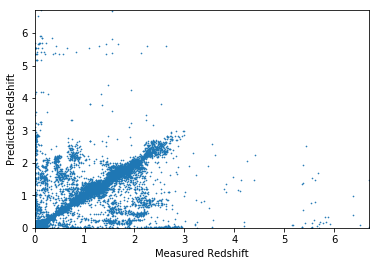

In [4]:
# # Cross Validation of Predictions

# Cross validation is an important part of ensuring that our model is returning values that are at least partially accurate. The problem with held-out validation is that the we are only able to get prediction values for the data in our test set.
# With k-fold cross validation each galaxy is tested at least once and because of this we are able to get a prediction value for every galaxy. We'll do this in the next question...



# # Assignment: KFold Cross Validated Predictions

# Complete the function cross_validate_predictions. This is very similar to the previous question except instead of returning the med_diff accuracy measurements we would like to return a predicted value for each of the galaxies.
# The function takes the same 4 arguments as the previous question, i.e. model, feaures, targets and k.
# Your function should return a single variable. The returned variable should be a 1-D numpy array of length , where  is the number of galaxies in our data set. You should make sure that you maintain the order of galaxies when giving your predictions, such that the first prediction in your array corresponds to the first galaxy in the features and targets arrays.


# # Assignment Code: 

# This is very similar to the previous problem. Here instead of using the predicted values for calculating the accuracy we simply put them into an array which the function returns. We initialise an array to store the predictions from each validation with...

# all_predictions = np.zeros(shape = (len(targets)))

# We then use the test_indices to keep the correct order when populating the array.

# all_predictions[test_indices] = predicted

# This ensures that we can compare the predictions their corresponding target values later when calculating the median difference and plotting the predicted values against actual values.

import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

# paste your get_features_targets function here
def get_features_targets(data):
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

# paste your median_diff function here
def median_diff(predicted, actual):
  return np.median(np.abs(predicted - actual))

# complete this function
def cross_validate_predictions(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # declare an array for predicted redshifts from each iteration
  all_predictions = np.zeros_like(targets)

  for train_indices, test_indices in kf.split(features):
    # split the data into training and testing
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]
    
    # fit the model for the current set
    model.fit(train_features, train_targets)
        
    # predict using the model
    predictions = model.predict(test_features)
        
    # put the predicted values in the all_predictions array defined above
    all_predictions[test_indices] = predictions

  # return the predictions
  return all_predictions


if __name__ == "__main__":
  data = np.load('./sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)

  # initialize model
  dtr = DecisionTreeRegressor(max_depth=19)

  # call your cross validation function
  predictions = cross_validate_predictions(dtr, features, targets, 10)

  # calculate and print the rmsd as a sanity check
  diffs = median_diff(predictions, targets)
  print('Median difference: {:.3f}'.format(diffs))

  # plot the results to see how well our model looks
  plt.scatter(targets, predictions, s=0.4)
  plt.xlim((0, targets.max()))
  plt.ylim((0, predictions.max()))
  plt.xlabel('Measured Redshift')
  plt.ylabel('Predicted Redshift')
  plt.show()

    
    
# # KFOLD DISCUSSION

# K-Fold cross validation is an important part of assessing the accuracy of any machine learning model. When we plotted our predicted vs measured redshifts we are able to see that for many our galaxies we were able to get a reasonably accurate prediction of redshift. However, there are also several outliers where our model does not give a good prediction.

# Predicted vs Measured Redshift Plot
# https://groklearning-cdn.com/modules/SjroKib6Hs5Fqxq53Vxme9/predicted_v_measured.png

# We have learnt the inner workings of k-Fold cross validation with the help of the KFold library. Now that you have a working understanding of k-Fold you should be aware that there are several methods and libraries in the sklearn.model_selection modules that provide off the shelf versions of some of the routines that we have just written.
# The cross_val_predict function performs the same actions as the cross_validate_predictions function you wrote in the previous question. It can be called with

# predictions = cross_val_predict(dtr, features, targets, cv=k)

# Where dtr is our decision tree regressor object, cv=k allows us to specify the number of folds(k) to use and features /targets are as we have used them so far.
# There is one other tool in the sklearn.model_selection library that is worth noting, the cross_val_score function. This provides a score of how well the model performed similar to the med_diff we have been using so far. We will not go into the usage here, but you need to specify which metric is used to score the model.


In [5]:
# # QSOs vs Galaxies

# You might be surprised to learn that our sample of galaxies consists of two different populations: regular galaxies and quasi-stellar objects (QSOs). QSOs are a type of galaxy that contain an actively (and intensly) accreting supermassive black hole. This is often referred to as an Active Galactic Nucleus (AGN).

# Galaxy with an AGN
# https://groklearning-cdn.com/modules/B9yuTkmwbvVYh65FcYjb2f/agn.png
    
# The light emitted from the AGN is significantly brighter than the rest of the galaxy and we are able to detect these QSOs out to much higher redshifts. In fact, most of the normal galaxies we have been using to create our models have redshifts less than z = (approx)0.4, while the QSOs have redshifts all the way out to z = (approx)6. Due to this contribution from the AGN, the flux magnitudes measured at different wavelengths might not follow the typical profile we assumed when predicting redshifts.
# In the next question we are going look at whether there is a difference in the accuracy of the decision trees between QSOs and regular galaxies.



# # Assignment: QSO vs Galaxies

# Write a function split_galaxies_qsos that splits our data containing both galaxies and QSOs into two arrays that contain only galaxies and QSOs respectively. Your function should take a single data argument.
# The function should return two NumPy arrays, the first galaxies containing only rows from data that are galaxies and the second qsos containing only rows that are QSOs.
# The data array contains a column data['spec_class'] where the values will either be b'GALAXY' or b'QSO'.

# Gotcha: use b'GALAXY' and not 'GALAXY'
# The spectral class is stored as a byte string (not Unicode strings), so the literals must have a b out the front. Comparing against 'GALAXY' will not match any rows, whereas b'GALAXY' will.

# Hint: use masking to select the rows
# We can use masking to select particular rows:

# import numpy as np
# data = np.load('sdss_galaxy_colors.npy')
# galaxies = data[data['spec_class'] == b'GALAXY']

# The inner data['spec_class'] == b'GALAXY' returns all of the indices that have a galaxy spectral type. These indices are then used to select the rows with the outer data[...].


# # Assignment Code: 

# This solution uses masking.

# qso_mask = data['spec_class'] == b'QSO'

# Creates an array of boolean values True if the data['spec_class'] == b'QSO' and False otherwise.
# We do the same for the galaxies and then create our two return arrays using the masks.

import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

# paste your get_features_targets function here
def get_features_targets(data):
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

# paste your median_diff function here
def median_diff(predicted, actual):
  return np.median(np.abs(predicted - actual))

# paste your cross_validate_model function here
def cross_validate_model(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # initialise a list to collect median_diffs for each iteration of the loop below
  diffs = []

  for train_indices, test_indices in kf.split(features):
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]
    
    # fit the model for the current set
    model.fit(train_features, train_targets)
    
    # predict using the model
    predictions = model.predict(test_features)
 
    # calculate the median_diff from predicted values and append to results array
    diffs.append(median_diff(predictions, test_targets))
 
  # return the list with your median difference values
  return diffs

# complete this function
def split_galaxies_qsos(data):
  # split the data into galaxies and qsos arrays
  galaxies = data[data['spec_class'] == b'GALAXY']
  qsos = data[data['spec_class'] == b'QSO']

  # return the seperated galaxies and qsos arrays
  return galaxies, qsos

def cross_validate_median_diff(data):
  features, targets = get_features_targets(data)
  dtr = DecisionTreeRegressor(max_depth=19)
  return np.mean(cross_validate_model(dtr, features, targets, 10))

if __name__ == "__main__":
  data = np.load('./sdss_galaxy_colors.npy')

  # split the data set into galaxies and QSOs
  galaxies, qsos= split_galaxies_qsos(data)

  # here we cross validate the model and get the cross-validated median difference
  # the cross_validated_med_diff function is in "written_functions"
  galaxy_med_diff = cross_validate_median_diff(galaxies)
  qso_med_diff = cross_validate_median_diff(qsos)

  # print the results
  print("Median difference for Galaxies: {:.3f}".format(galaxy_med_diff))
  print("Median difference for QSOs: {:.3f}".format(qso_med_diff))
    
    
# # QSO Discussion

# So our QSOs have a greater median residual (=(approx)0.074) than the galaxies (=(approx)0.016). There are a couple of possibilities why this is the case.
# * There are far fewer QSOs (8525) than galaxies (41,475).
# * Galaxies aren't as bright as QSOs so they become too faint to be detected with SDSS at redshifts  0.4. This creates a measurement bias.

# When I take a random sample of galaxies the same size as the QSO data set I get a med_diff of =(approx)0.018 which is slightly higher than the full set, but not enough to account for the gap between the two populations.
# The figure below shows the normalised distribution function of the two populations.



Median difference for Galaxies: 0.016
Median difference for QSOs: 0.074


In [6]:
# # SUMMARY

# We have looked at how decision trees are prone to overfitting the model and how limiting the maximum depth of the tree can be used to prevent this. By comparing the accuracy of the model on the training set with that of the test set for different tree depths we found that a maximum tree depth of 19 was suitable for our model.
# We looked at -fold cross validation and the various methods that can be used to implement it. -fold cross validation mitigates the risk that the training set has a unique or specific population of the data set; For example if all the training data contained QSOs and the testing set regular galaxies. -folds cross validation also allows you to get a prediction for all the points in your data set.
# We concluded by looking at the sub-population of QSOs and how their accuracy measurement was significantly worse than that of the other galaxies. On closer inspection we found that this was a measurement bias resulting from the difference in the range of redshifts in each population.
# You have hopefully learnt all the tools necessary to implement a decision tree on a regression problem of your own. In the next module we will look at how decision trees can be used for classification. We will be using them to classify galaxies as either an elliptical, a spiral or a merger.



# Congratulations, you've finished this set of activities.
# If you've still got questions about any of the content, head to the forums to discuss with your fellow learners.
# Now head back to Coursera for the next lecture.